# Import Necessary Packages

In [1]:
import cv2
from PIL import Image
import numpy as np
import torch, os
from skimage.color import label2rgb
from PIL import ImageColor


# Define Label Dictionary

In [2]:
id2label_dict = {
        0: 'lung_overall',
        1: 'lung_right',
        2: 'lung_left',
        3: 'lung_left_lobeupper',
        4: 'lung_left_lobelower',
        5: 'lung_right_lobeupper',
        6: 'lung_right_lobemiddle',
        7: 'lung_right_lobelower',
        8: 'lung_right_vessel',
        9: 'lung_left_vessel',
        10: 'mediastinum_overall',
        11: 'mediastinum_lower',
        12: 'mediastinum_upper',
        13: 'mediastinum_anterior',
        14: 'mediastinum_middle',
        15: 'mediastinum_posterior',
        16: 'mediastinum_upper',
        17: 'heart',
        18: 'airways',
        19: 'esophagus',
        20: 'aorta',
        21: 'aorta_descending',
        22: 'aorta_arch',
        23: 'aorta_ascending',
        
        24: 'bones',
        25: 'spine',
        26: 'c1',
        27: 'c2',
        28: 'c3',
        29: 'c4',
        30: 'c5',
        31: 'c6',
        32: 'c7',
        33: 't1',
        34: 't2',
        35: 't3',
        36: 't4',
        37: 't5',
        38: 't6',
        39: 't7',
        40: 't8',
        41: 't9',
        42: 't10',
        43: 't11',
        44: 't12',
        45: 'l1',
        46: 'l2',
        47: 'l3',
        48: 'l4',
        49: 'l5',
        50: 'l6',
        51: 'sacrum',
        52: 'cocygis',
        53: 't13',
        
        54: 'ribs',
        
        55: 'rib_1',
        56: 'rib_2',
        57: 'rib_3',
        58: 'rib_4',
        59: 'rib_5',
        60: 'rib_6',
        61: 'rib_7',
        62: 'rib_8',
        63: 'rib_9',
        64: 'rib_10',
        65: 'rib_11',
        66: 'rib_12',
        
        67: 'rib_anterior_1',
        68: 'rib_posterior_1',
        69: 'rib_anterior_2',
        70: 'rib_posterior_2',
        71: 'rib_anterior_3',
        72: 'rib_posterior_3',
        73: 'rib_anterior_4',
        74: 'rib_posterior_4',
        75: 'rib_anterior_5',
        76: 'rib_posterior_5',
        77: 'rib_anterior_6',
        78: 'rib_posterior_6',
        79: 'rib_anterior_7',
        80: 'rib_posterior_7',
        81: 'rib_anterior_8',
        82: 'rib_posterior_8',
        83: 'rib_anterior_9',
        84: 'rib_posterior_9',
        85: 'rib_anterior_10',
        86: 'rib_posterior_10',
        87: 'rib_anterior_11',
        88: 'rib_posterior_11',
        89: 'rib_anterior_12',
        90: 'rib_posterior_12',
        
        91: 'rib_left_1',
        92: 'rib_right_1',
        93: 'rib_left_2',
        94: 'rib_right_2',
        95: 'rib_left_3',
        96: 'rib_right_3',
        97: 'rib_left_4',
        98: 'rib_right_4',
        99: 'rib_left_5',
        100: 'rib_right_5',
        101: 'rib_left_6',
        102: 'rib_right_6',
        103: 'rib_left_7',
        104: 'rib_right_7',
        105: 'rib_left_8',
        106: 'rib_right_8',
        107: 'rib_left_9',
        108: 'rib_right_9',
        109: 'rib_left_10',
        110: 'rib_right_10',
        111: 'rib_left_11',
        112: 'rib_right_11',
        113: 'rib_left_12',
        114: 'rib_right_12',
        
        115: 'rib_left_anterior_1',
        116: 'rib_left_posterior_1',
        117: 'rib_right_anterior_1',
        118: 'rib_right_posterior_1',
    
        119: 'rib_left_anterior_2',
        120: 'rib_left_posterior_2',
        121: 'rib_right_anterior_2',
        122: 'rib_right_posterior_2',
        
        123: 'rib_left_anterior_3',
        124: 'rib_left_posterior_3',
        125: 'rib_right_anterior_3',
        126: 'rib_right_posterior_3',
        
        127: 'rib_left_anterior_4',
        128: 'rib_left_posterior_4',
        129: 'rib_right_anterior_4',
        130: 'rib_right_posterior_4',
    
        131: 'rib_left_anterior_5',
        132: 'rib_left_posterior_5',
        133: 'rib_right_anterior_5',
        134: 'rib_right_posterior_5',
        
        135: 'rib_left_anterior_6',
        136: 'rib_left_posterior_6',
        137: 'rib_right_anterior_6',
        138: 'rib_right_posterior_6',
        
        139: 'rib_left_anterior_7',
        140: 'rib_left_posterior_7',
        141: 'rib_right_anterior_7',
        142: 'rib_right_posterior_7',
        
        143: 'rib_left_anterior_8',
        144: 'rib_left_posterior_8',
        145: 'rib_right_anterior_8',
        146: 'rib_right_posterior_8',
        
        147: 'rib_left_anterior_9',
        148: 'rib_left_posterior_9',
        149: 'rib_right_anterior_9',
        150: 'rib_right_posterior_9',
        
        151: 'rib_left_anterior_10',
        152: 'rib_left_posterior_10',
        153: 'rib_right_anterior_10',
        154: 'rib_right_posterior_10',
        
        155: 'rib_left_anterior_11',
        156: 'rib_left_posterior_11',
        157: 'rib_right_anterior_11',
        158: 'rib_right_posterior_11',
        
        159: 'rib_left_anterior_12',
        160: 'rib_left_posterior_12',
        161: 'rib_right_anterior_12',
        162: 'rib_right_posterior_12',              
        
        163: 'diaphragm',
        164: 'hemidiaphragm_right',
        165: 'hemidiaphragm_left',
    }

label2id_dict = {id2label_dict[k]:k for k in id2label_dict.keys()}

# Define necessary functions

In [8]:
def get_img(path):
    return np.array(Image.open(path).convert('L'))

def get_label(path):
    return np.load(path)

def visualize_label(label, img, concat = False):
    colors = [
            '#007F5C',
            '#98FF98',
            '#FFEF00',
            '#002366',
            '#DA2C43',
            '#808080',
            '#F3722C',
            '#577590',
            '#F9C74F',
            '#F94144',
            '#90BE6D',
            '#43AA8B',
            '#F8961E',
        ]

    colors = [[float(j)/255 for j in ImageColor.getcolor(i, "RGB")] for i in colors]
    
    out = img #np.zeros(img.shape) #(in_seg*255).astype(np.uint8)
    a =  torch.arange(label.shape[0]).view(-1,1,1).numpy() * label.shape[0] + 1
    out =  (label2rgb((label*a).sum(0), img, colors=colors, bg_label = 0, alpha=0.5, image_alpha = 1) * 255).astype(np.uint8)
    
    for i in range(label.shape[0]):
        imgray = (label[i,:,:]*255).astype(np.uint8)
        ret, thresh = cv2.threshold(imgray, 127, 255, 0)
        x = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#         cv2.drawContours(out, x[0], -1, (0,0,0), 1)
        cv2.drawContours(out, x[0], -1, [int(j*255) for j in colors[i % len(colors)]], 1)
    
    if concat:
        return Image.fromarray(np.concatenate([np.stack([img]*3,-1), out],1)).convert('RGB')
    else:
        return Image.fromarray(out).convert('RGB')
    
def visualize_certain_labels(names, img_path, label_path):
    img = get_img(img_path)
    label = get_label(label_path)
    
    if type(names) == list:
        pass
    else:
        names = [names]
    
    label_to_visualize = [label2id_dict[n] for n in names]
    label = label[label_to_visualize,:,:]
    
    return visualize_label(label, img)
    

# Choose View and Image ID paths

In [9]:
idx  = 256
view = 'frontal'

path_img = "/cvhci/data/Chest_Xray/PAnDa/images/RibFrac{}{}.png".format(idx,view)
path_label = "./prediction/RibFrac{}{}.npy".format(idx,view)

# Visualize desired labels

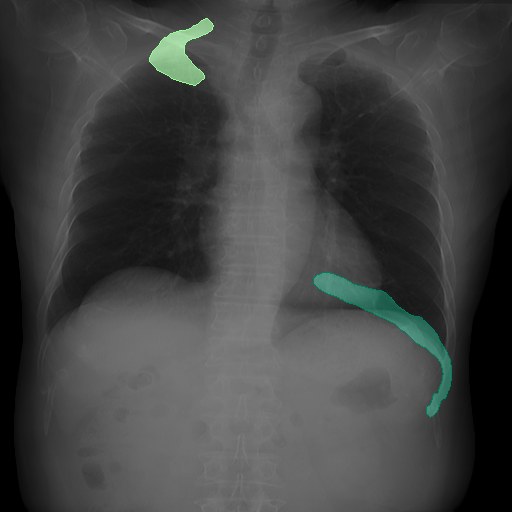

In [10]:
visualize_certain_labels(['rib_left_10', 'rib_right_1'], path_img, path_label)

# Visualize all labels

(512, 512, 3)


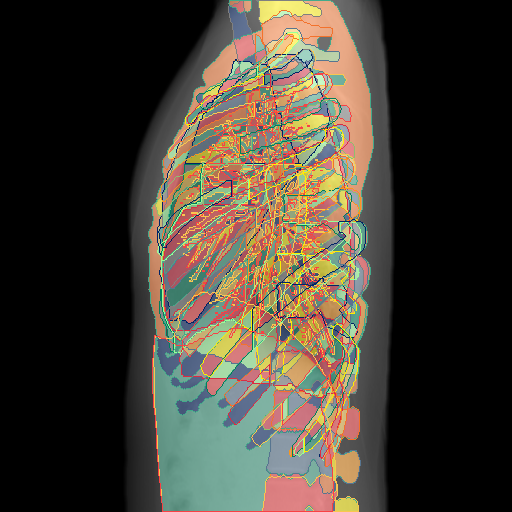

In [6]:
label = get_label(path_label)
img = get_img(path_img)
visualize_label(label, img)